<a href="https://colab.research.google.com/github/ahdi3/DeepLearningTask2/blob/main/TaskWeek3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Ahdi Nazzalul Ahsan

NPM: 2206812956

# PyTorch Crash Course

Overview:

1.   Tensor Basic
    *   Create, Operations, NumPy, GPU Support
2.   Autograd
    *   Linear regression example
3.   Training Loop with: Model, Loss & Optimizer
    *   A typical PyTorch training pipeline
4.   Neural Network
    *   Also: GPU, datasets, DataLoader, Transforms & Evaluation
5.   Convolutional Neural Network
    *   Also: Save/Load model



# 1. Tensors

Everything in PyTorch is based on Tensor operations. A Tensor is multi-dimensional matrix containing elements of a single data type:

In [ ]:
import torch

# torch.empty(size): uninstiallized
x = torch.empty(1)  #scalar
print("empty(1):", x)

x = torch.empty(3)  #vector
print("empty(3):", x)

x = torch.empty(2,3)  #matrix
print("empty(2,3):", x)

x = torch.empty(2,2,3)  #tensor, 3 dimensions
#x = torch.empty(2,2,2,3)  #tensor, 4 dimensions
print("empty(2,2,3):", x)

#torch.rand(size): random numbers [0,1]
x = torch.rand(5,3)
print("rand(5,3):",x)

#torch.zeros(size), fill with 0
#torch.ones(size), fill with 1
x = torch.zeros(5,3)
print("zeros(5,3:)",x)

empty(1): tensor([-2.2241e-20])
empty(3): tensor([-4.9791e-20,  3.0743e-41, -2.0868e-20])
empty(2,3): tensor([[-8.0945e+03,  3.0747e-41,  0.0000e+00],
        [ 1.4013e-45,  0.0000e+00,  3.0743e-41]])
empty(2,2,3): tensor([[[-2.5539e-20,  3.0743e-41, -4.9546e-20],
         [ 3.0743e-41, -8.2564e-02,  4.5632e-41]],

        [[-8.2684e-02,  4.5632e-41, -8.2531e-02],
         [ 4.5632e-41, -8.2607e-02,  4.5632e-41]]])
rand(5,3): tensor([[0.4635, 0.6476, 0.7131],
        [0.5929, 0.3909, 0.0276],
        [0.1009, 0.6987, 0.1785],
        [0.7706, 0.7604, 0.6798],
        [0.7220, 0.6703, 0.2647]])
zeros(5,3:) tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
# check size
print("size", x.size()) # x.size(0)
print("shape",x.shape)

size torch.Size([5, 3])
shape torch.Size([5, 3])


In [ ]:
# check data type
print(x.dtype)

# specify type, float32 default
x = torch.zeros(5, 3, dtype=torch.float16)
print(x)

# check type
print(x.dtype)

torch.float32
tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]], dtype=torch.float16)
torch.float16


In [ ]:
# construct from data
x = torch.tensor([5.5, 3])
print(x, x.dtype)

tensor([5.5000, 3.0000]) torch.float32


In [ ]:
# requires_grad argument
# This will tell pytorch that it will need to calculate the gradients for this tensor
# later in your optimization steps
# i.e. this is a variable in your model that you want to optimize
x = torch.tensor([5.5, 3], requires_grad=True)
print(x)

tensor([5.5000, 3.0000], requires_grad=True)


Operations with Tensors

In [ ]:
# Operations
x = torch.ones(2, 2)
y = torch.rand(2, 2)

# elementwise addition
z = x + y
# torch.add(x,y)

# in place addition, everythin with a trailing underscore is an inplace operation
# i.e. it will modify the variable
# y.add_(x)

print(x)
print(y)
print(z)

tensor([[1., 1.],
        [1., 1.]])
tensor([[0.1060, 0.8703],
        [0.8296, 0.7657]])
tensor([[1.1060, 1.8703],
        [1.8296, 1.7657]])


In [ ]:
# subtraction
z = x - y
z = torch.sub(x, y)

# multiplication
z = x * y
z = torch.mul(x,y)

# division
z = x / y
z = torch.div(x,y)

In [ ]:
# Slicing
x = torch.rand(5,3)
print(x)
print("x[:, 0]", x[:, 0]) # all rows, column 0
print("x[1, :]", x[1, :]) # row 1, all columns
print("x[1, 1]", x[1,1]) # element at 1, 1

# Get the actual value if only 1 element in your tensor
print("x[1,1].item()", x[1,1].item())

tensor([[0.5030, 0.5930, 0.5661],
        [0.1566, 0.8943, 0.8064],
        [0.2856, 0.0846, 0.1190],
        [0.2306, 0.5714, 0.8600],
        [0.0213, 0.5067, 0.8207]])
x[:, 0] tensor([0.5030, 0.1566, 0.2856, 0.2306, 0.0213])
x[1, :] tensor([0.1566, 0.8943, 0.8064])
x[1, 1] tensor(0.8943)
x[1,1].item() 0.8943256735801697


In [ ]:
# Reshape with torch.view()
x = torch.randn(4, 4)
y = x.view(16)
z = x.view(-1, 8)  # the size -1 is inferred from other dimensions
# if -1 it pytorch will automatically determine the necessary size
print(x.size(), y.size(), z.size())

torch.Size([4, 4]) torch.Size([16]) torch.Size([2, 8])


## NumPy

Converting a Torch Tensor to a NumPy array and vice versa is ver easy

In [ ]:
a = torch.ones(5)
print(a)

# torch to numpy with .numpy()
b = a.numpy()
print(b)
print(type(b))

tensor([1., 1., 1., 1., 1.])
[1. 1. 1. 1. 1.]
<class 'numpy.ndarray'>


In [ ]:
# Careful: If the Tensor is on the CPU (not the GPU),
# both objects will share the same memory location, so changing one
# will also change the other
a.add_(1)
print(a)
print(b)

tensor([2., 2., 2., 2., 2.])
[2. 2. 2. 2. 2.]


In [ ]:
# numpy to torch with .from_numpy(x), or torch.tensor() to copy it
import numpy as np
a = np.ones(5)
b = torch.from_numpy(a)
c = torch.tensor(a)
print(a)
print(b)
print(c)

# again be careful when modifying
a += 1
print(a)
print(b)
print(c)

[1. 1. 1. 1. 1.]
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)
[2. 2. 2. 2. 2.]
tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


## GPU Support

By default all tensors are created on the CPU. But we can also move them to the GPU (if it's available), or create them directly on the GPU.

In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

x = torch.rand(2,2).to(device)  # move tensors to GPU device
#x = x.to("cpu")
#x = x.to("cuda")

x = torch.rand(2,2, device=device)  # or directy create them on GPU

# 2. Autograd

The autograd package provides automatic differention for all operations on Tensors. Generally speaking, *torch.autograd* is an engine for computing the vector-Jacobian product. It computes partial derivates while applying the chain rule.

Set `requires_grad = True`:

In [ ]:
import torch

# requires_grad = True -> tracks all operations on the tensor.
x = torch.randn(3, requires_grad=True)
y = x + 2

# y was created as a result of an operation, so it has a grad_fn attribute.
# grad_fn: references a Function that has created the Tensor
print(x) # created by the user -> grad_fn is None
print(y)
print(y.grad_fn)

tensor([ 0.8645, -0.9317,  0.5386], requires_grad=True)
tensor([2.8645, 1.0683, 2.5386], grad_fn=<AddBackward0>)


In [ ]:
# Do more operations on y
z = y * y * 3
print(z)
z = z.mean()
print(z)

tensor([24.6153,  3.4240, 19.3329], grad_fn=<MulBackward0>)
tensor(15.7907, grad_fn=<MeanBackward0>)


In [ ]:
# Let's compute the gradients with backpropagation
# When we finish our computation we can call .backward() and have all the gradients computed automatically.
# The gradient for this tensor will be accumulated into .grad attribute.
# It is the partial derivate of the function w.r.t. the tensor

print(x.grad)
z.backward()
print(x.grad) # dz/dx

# !!! Careful!!! backward() accumulates the gradient for this tensor into .grad attribute.
# !!! We need to be careful during optimization !!! optimizer.zero_grad()

None
tensor([5.7289, 2.1367, 5.0771])


#### Stop a tensor from tracking history:
For example during the training loop when we want to update our weights, or after training during evaluation. These operations should not be part of the gradient computation. To prevent this, we can use:

- `x.requires_grad_(False)`
- `x.detach()`
- wrap in `with torch.no_grad():`

In [ ]:
# .requires_grad_(...) changes an existing flag in-place.
a = torch.randn(2, 2)
b = (a * a).sum()
print(a.requires_grad)
print(b.grad_fn)

a.requires_grad_(True)
b = (a * a).sum()
print(a.requires_grad)
print(b.grad_fn)

False
None
True


In [ ]:
# .detach(): get a new Tensor with the same content but no gradient computation:

# Membuat tensor a dengan ukuran (2, 2) dan mengaktifkan perhitungan gradien
a = torch.randn(2, 2, requires_grad=True)

# Membuat tensor b yang merupakan salinan tensor a tanpa keterlibatan gradien
b = a.detach()

# Memeriksa apakah tensor a menghitung gradien
print(a.requires_grad)

# Memeriksa apakah tensor b menghitung gradien
print(b.requires_grad)

True
False


In [ ]:
# wrap in 'with torch.no_grad():'

# Membuat tensor 'a' dengan ukuran (2, 2) dan mengaktifkan perhitungan gradien
a = torch.randn(2, 2, requires_grad=True)

# Mencetak status 'requires_grad' dari tensor 'a'
print(a.requires_grad)

# Memasuki blok 'no_grad' untuk menghentikan perhitungan gradien
with torch.no_grad():
    # Melakukan operasi di dalam blok no_grad
    b = a ** 2
    # Mencetak status 'requires_grad' dari tensor 'b'
    print(b.requires_grad)

True
False


## Gradient Descent Autograd
Linear Regression example:

$f(x) = w * x + b$

here : `f(x) = 2 * x`

In [ ]:
import torch

# Linear regression
# f = w * x  + b
# here : f = 2 * x

X = torch.tensor([1, 2, 3, 4, 5, 6, 7, 8], dtype=torch.float32)   # Data input
Y = torch.tensor([2, 4, 6, 8, 10, 12, 14, 16], dtype=torch.float32)   # Data output yang diharapkan

w = torch.tensor(0.0, dtype=torch.float32, requires_grad=True)     # Bobot yang akan dilatih

# model output
def forward(x):
    return w * x    # Menghitung f(x) = w * x

# loss = MSE (Mean Squared Error)
def loss(y, y_pred):
    return ((y_pred - y)**2).mean()

X_test = 5.0  # Data input untuk pengujian

print(f'Prediction before training: f({X_test}) = {forward(X_test).item():.3f}')

Prediction before training: f(5.0) = 0.000


In [ ]:
# Training
learning_rate = 0.01
n_epochs = 100

for epoch in range(n_epochs):
    # predict = forward pass
    y_pred = forward(X)

    # loss
    l = loss(Y, y_pred)

    # calculate gradients = backward pass
    l.backward()

    # update weights
    #w.data = w.data - learning_rate * w.grad
    with torch.no_grad():
      w -= learning_rate * w.grad

    # zero the gradients after updating
    w.grad.zero_()

    if (epoch+1) % 10 == 0:
        print(f'epoch {epoch+1}: w = {w.item():.3f}, loss = {l.item():.3f}')

print(f'Prediction after training: f({X_test}) = {forward(X_test).item():.3f}')

epoch 10: w = 1.998, loss = 0.000
epoch 20: w = 2.000, loss = 0.000
epoch 30: w = 2.000, loss = 0.000
epoch 40: w = 2.000, loss = 0.000
epoch 50: w = 2.000, loss = 0.000
epoch 60: w = 2.000, loss = 0.000
epoch 70: w = 2.000, loss = 0.000
epoch 80: w = 2.000, loss = 0.000
epoch 90: w = 2.000, loss = 0.000
epoch 100: w = 2.000, loss = 0.000
Prediction after training: f(5.0) = 10.000


# 3. Model, Loss & Optimizer

A typical PyTorch pipeline looks like this:

1. Design model (input, output, forward pass with different layers)
2. Construct loss and optimizer
3. Training loop:
  - Forward = compute prediction and loss
  - Backward = compute gradients
  - Update weights

In [ ]:
import torch
import torch.nn as nn

# Linear regression
# f = w * x
# here : f = 2 * x

# 0) Training samples, watch the shape!
X = torch.tensor([[1], [2], [3], [4], [5], [6], [7], [8]], dtype=torch.float32)
Y = torch.tensor([[2], [4], [6], [8], [10], [12], [14], [16]], dtype=torch.float32)

n_samples, n_features = X.shape
print(f'n_samples = {n_samples}, n_features = {n_features}')

# 0) create a test sample
X_test = torch.tensor([5], dtype=torch.float32)

n_samples = 8, n_features = 1


In [ ]:
# 1) Design Model, the model has to implement the forward pass!

# Here we could simply use a built-in model from PyTorch
# model = nn.Linear(input_size, output_size)

class LinearRegression(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegression, self).__init__()
        # define different layers
        self.lin = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        return self.lin(x)


input_size, output_size = n_features, n_features

model = LinearRegression(input_size, output_size)

print(f'Prediction before training: f({X_test.item()}) = {model(X_test).item():.3f}')

# 2) Define loss and optimizer
learning_rate = 0.01
n_epochs = 100

loss = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#Loss Function (MSE): Menggunakan Mean Squared Error (MSE) untuk mengukur error antara prediksi dan nilai sebenarnya. Ini adalah fungsi yang umum digunakan dalam regresi linear.
#Optimizer (SGD): Menggunakan Stochastic Gradient Descent (SGD) untuk memperbarui bobot model berdasarkan gradient yang dihitung selama pelatihan.

# 3) Training loop
for epoch in range(n_epochs):
    # predict = forward pass with our model. Model digunakan untuk melakukan prediksi dengan data x
    y_predicted = model(X)

    # loss. Compute loss: Error antara prediksi model (y_predicted) dan target sebenarnya (Y) dihitung menggunakan loss function.
    l = loss(Y, y_predicted)

    # calculate gradients = backward pass. Menghitung gradient dari loss terhadap parameter model dengan l.backward().
    l.backward()

    # update weights. Optimizer memperbarui parameter model berdasarkan gradient yang dihitung.
    optimizer.step()

    # zero the gradients after updating. Gradien di-nol-kan setelah setiap langkah pembaruan untuk menghindari akumulasi gradien dari iterasi sebelumnya.
    optimizer.zero_grad()

    #Setiap 10 epoch, bobot model (w) dan loss dilaporkan untuk memantau proses pelatihan.
    if (epoch+1) % 10 == 0:
        w, b = model.parameters() # unpack parameters
        print('epoch ', epoch+1, ': w = ', w[0][0].item(), ' loss = ', l.item())

# Setelah pelatihan, prediksi model diuji kembali menggunakan data X_test.
print(f'Prediction after training: f({X_test.item()}) = {model(X_test).item():.3f}')

Prediction before training: f(5.0) = 4.020
epoch  10 : w =  1.8482005596160889  loss =  0.14992433786392212
epoch  20 : w =  1.8547983169555664  loss =  0.13834638893604279
epoch  30 : w =  1.8604925870895386  loss =  0.12770897150039673
epoch  40 : w =  1.8659632205963135  loss =  0.1178894191980362
epoch  50 : w =  1.8712193965911865  loss =  0.1088249608874321
epoch  60 : w =  1.8762692213058472  loss =  0.10045753419399261
epoch  70 : w =  1.881121277809143  loss =  0.09273336082696915
epoch  80 : w =  1.8857828378677368  loss =  0.08560314029455185
epoch  90 : w =  1.8902617692947388  loss =  0.07902111858129501
epoch  100 : w =  1.8945649862289429  loss =  0.07294512540102005
Prediction after training: f(5.0) = 10.066


Kesimpulan, Kode ini melakukan regresi linear dengan menggunakan PyTorch, di mana model dilatih menggunakan stochastic gradient descent (SGD) dengan mean squared error (MSE) sebagai fungsi loss.

# 4. First Neural Net
GPU, Datasets, DataLoader, Transforms, Neural Net, Training & Evaluation


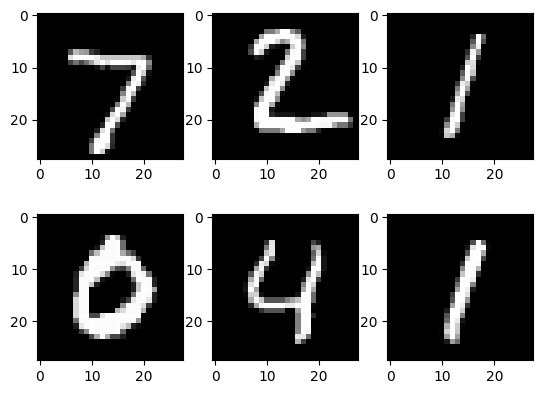

In [ ]:
import torch  # Library utama PyTorch untuk operasi tensor
import torch.nn as nn # Modul untuk membuat dan mengelola neural network.
import torchvision  # Sub-paket PyTorch untuk bekerja dengan dataset gambar dan transformasi data.
import torchvision.transforms as transforms # Alat untuk melakukan transformasi data (seperti mengonversi gambar ke tensor).
import matplotlib.pyplot as plt # Digunakan untuk menampilkan gambar secara visual.

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
input_size = 784 # 28x28
hidden_size = 500
num_classes = 10
num_epochs = 2
batch_size = 100
learning_rate = 0.001

# MNIST dataset

# Dataset MNIST untuk pelatihan. MNIST adalah dataset gambar tulisan tangan berukuran 28x28 piksel.
# Di sini, dataset dimuat dengan opsi train=True, yang berarti ini adalah data pelatihan.
# Gambar-gambar diubah menjadi tensor menggunakan transforms.ToTensor() agar bisa digunakan oleh PyTorch.
train_dataset = torchvision.datasets.MNIST(root='./data',
                                           train=True,
                                           transform=transforms.ToTensor(),
                                           download=True)

# Dataset MNIST untuk pengujian, dengan train=False, artinya ini adalah data uji.
# Sama seperti data pelatihan, gambar juga dikonversi menjadi tensor.
test_dataset = torchvision.datasets.MNIST(root='./data',
                                          train=False,
                                          transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

examples = iter(test_loader)
example_data, example_targets = next(examples)

for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(example_data[i][0], cmap='gray')
plt.show()

Kesimpulan, Kode ini mempersiapkan dataset MNIST untuk pelatihan dan pengujian, memuat data menggunakan dataloader, dan menampilkan beberapa contoh gambar dari dataset MNIST. Kode ini juga siap untuk dihubungkan ke model neural network yang dilatih di GPU (jika tersedia) atau CPU.

In [ ]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        # no activation and no softmax at the end
        return out

# Membuat instansi model dengan ukuran input, ukuran hidden layer, dan jumlah kelas.
# Model ini di-load ke perangkat yang tersedia (device: GPU atau CPU).
model = NeuralNet(input_size, hidden_size, num_classes).to(device)

# Loss and Optimizer
# Loss function: Menggunakan CrossEntropyLoss, yang cocok untuk tugas klasifikasi multi-kelas.
criterion = nn.CrossEntropyLoss()
# Optimizer: Menggunakan Adam optimizer, yang merupakan salah satu optimizer populer yang menggunakan adaptive learning rate untuk mempercepat konvergensi.
# Parameter model diperbarui selama pelatihan berdasarkan gradien.
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Train the model
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images, labels) in enumerate(train_loader):
        # origin shape: [100, 1, 28, 28]
        # resized: [100, 784]
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # Forward pass and loss calculation
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if (i+1) % 100 == 0:
            print (f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{n_total_steps}], Loss: {loss.item():.4f}')

Epoch [1/2], Step [100/600], Loss: 0.3510
Epoch [1/2], Step [200/600], Loss: 0.2266
Epoch [1/2], Step [300/600], Loss: 0.3018
Epoch [1/2], Step [400/600], Loss: 0.1346
Epoch [1/2], Step [500/600], Loss: 0.0708
Epoch [1/2], Step [600/600], Loss: 0.1039
Epoch [2/2], Step [100/600], Loss: 0.0630
Epoch [2/2], Step [200/600], Loss: 0.1195
Epoch [2/2], Step [300/600], Loss: 0.1127
Epoch [2/2], Step [400/600], Loss: 0.0585
Epoch [2/2], Step [500/600], Loss: 0.1008
Epoch [2/2], Step [600/600], Loss: 0.1326


Kesimpulan:



*   Kode ini mendefinisikan neural network sederhana dengan satu hidden layer dan menggunakan dataset MNIST untuk klasifikasi.

*   Proses pelatihan mencakup forward pass, perhitungan loss, backpropagation, dan optimasi.


*   Logging dilakukan untuk memantau loss setelah beberapa batch.





In [ ]:
# Test the model: we don't need to compute gradients

# Blok kode ini memastikan bahwa gradien tidak dihitung selama proses pengujian. Ini menghemat memori dan mempercepat proses pengujian karena kita tidak perlu melakukan backpropagation saat menguji model.
with torch.no_grad():
    n_correct = 0   # Menyimpan jumlah prediksi yang benar.
    n_samples = len(test_loader.dataset)   #Total jumlah gambar dalam dataset uji.

    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        outputs = model(images)  #Melakukan forward pass untuk mendapatkan prediksi model pada gambar input.

        # max returns (output_value ,index)
        _, predicted = torch.max(outputs, 1)
        n_correct += (predicted == labels).sum().item()

    acc = n_correct / n_samples
    print(f'Accuracy of the network on the {n_samples} test images: {100*acc} %')

Accuracy of the network on the 10000 test images: 97.04 %


Kesimpulan:


*   torch.no_grad() digunakan agar tidak menghitung gradien selama pengujian.
*   Gambar-gambar diuji satu per satu, dan prediksi model dibandingkan dengan label asli.

*   Akurasi dihitung dengan membandingkan jumlah prediksi yang benar dengan total gambar.





# 5. CNN

This section covers:

- Convolutional Layers
- MaxPooling
- Save/Load model

Files already downloaded and verified
Files already downloaded and verified


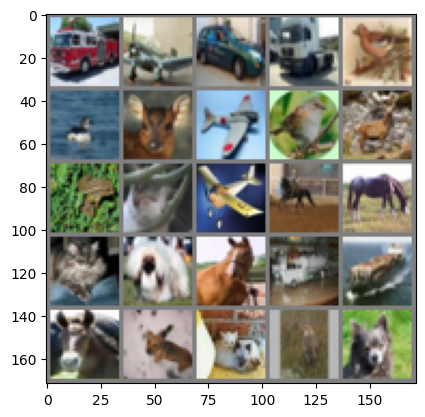

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters
num_epochs = 10
batch_size = 32
learning_rate = 0.001

# dataset has PILImage images of range [0, 1].
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')   # Berisi nama-nama kelas dalam dataset CIFAR-10.

def imshow(imgs):
    imgs = imgs / 2 + 0.5   # unnormalize
    npimgs = imgs.numpy()
    plt.imshow(np.transpose(npimgs, (1, 2, 0)))
    plt.show()

# one batch of random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
img_grid = torchvision.utils.make_grid(images[0:25], nrow=5)
imshow(img_grid)

Kesimpulan:


*   Kode ini mendownload dataset CIFAR-10, menerapkan transformasi (ToTensor dan Normalize), dan memuatnya menggunakan DataLoader.
*   Gambar dalam dataset ditampilkan dalam bentuk grid menggunakan matplotlib.



In [ ]:
class ConvNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 32, 3)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(32, 64, 3)
        self.conv3 = nn.Conv2d(64, 64, 3)
        self.fc1 = nn.Linear(64*4*4, 64)
        self.fc2 = nn.Linear(64, 10)

    def forward(self, x):
        # N, 3, 32, 32
        x = F.relu(self.conv1(x))   # -> N, 32, 30, 30
        x = self.pool(x)            # -> N, 32, 15, 15
        x = F.relu(self.conv2(x))   # -> N, 64, 13, 13
        x = self.pool(x)            # -> N, 64, 6, 6
        x = F.relu(self.conv3(x))   # -> N, 64, 4, 4
        x = torch.flatten(x, 1)     # -> N, 1024
        x = F.relu(self.fc1(x))     # -> N, 64
        x = self.fc2(x)             # -> N, 10
        return x


model = ConvNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

n_total_steps = len(train_loader)
for epoch in range(num_epochs):

    running_loss = 0.0

    for i, (images, labels) in enumerate(train_loader):
        images = images.to(device)
        labels = labels.to(device)

        # Forward pass
        outputs = model(images)
        loss = criterion(outputs, labels)

        # Backward and optimize
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        running_loss += loss.item()

    print(f'[{epoch + 1}] loss: {running_loss / n_total_steps:.3f}')

print('Finished Training')
PATH = './cnn.pth'
torch.save(model.state_dict(), PATH)

[1] loss: 1.479
[2] loss: 1.109
[3] loss: 0.933
[4] loss: 0.826
[5] loss: 0.737
[6] loss: 0.681
[7] loss: 0.633
[8] loss: 0.584
[9] loss: 0.544
[10] loss: 0.499
Finished Training


Kesimpulan:


*   Kode ini mendefinisikan sebuah CNN sederhana dengan tiga lapisan konvolusi dan dua fully connected layers.
*   Proses pelatihan menggunakan Adam optimizer dan CrossEntropyLoss sebagai fungsi loss.
*   Model dilatih dengan dataset gambar yang dimuat menggunakan DataLoader, dan loss dihitung dan ditampilkan setiap epoch.
*   Setelah pelatihan, model disimpan ke dalam file .pth yang bisa digunakan untuk prediksi atau dilanjutkan pelatihannya di kemudian hari.



In [ ]:
loaded_model = ConvNet()
loaded_model.load_state_dict(torch.load(PATH)) # it takes the loaded dictionary, not the path file itself
loaded_model.to(device)
loaded_model.eval()

with torch.no_grad():
    n_correct = 0
    n_correct2 = 0
    n_samples = len(test_loader.dataset)

    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)

        # max returns (value ,index)
        _, predicted = torch.max(outputs, 1)
        n_correct += (predicted == labels).sum().item()

        outputs2 = loaded_model(images)
        _, predicted2 = torch.max(outputs2, 1)
        n_correct2 += (predicted2 == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'Accuracy of the model: {acc} %')

    acc = 100.0 * n_correct2 / n_samples
    print(f'Accuracy of the loaded model: {acc} %')

<ipython-input-79-edd86cdeb3ea>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(PATH)) # it takes the loaded dictionary, not the pat

Accuracy of the model: 71.92 %
Accuracy of the loaded model: 71.92 %
